**INTRODUCTION**

The objective of this project is to develop a machine learning model which predicts whether a student will pass or fail based on the factors such as their academic records, gender,ethnicity,information about their parents,exam preparation and lifestyle.
The model will help in identifying students who need special academic training and mentoring.

Here, the 'Student Performance in Exams' dataset from Kaggle is used.

**LINK** : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
df = pd.read_csv("/content/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


To understand the score of each student clearly, an 'average_score' column is added. It holds the average of all three test scores for each student.

The column 'result' holds a string, "pass" or "fail".
The criteria for passing the exam is that the average score of the student should be atleast 50.

This is applied to all the values in the column 'average_score'.
The result , "pass" or "fail" , is stored in the column 'result'.

In [ ]:
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["result"] = df["average_score"].apply(lambda x: "pass" if x >= 50 else "fail")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,fail
4,male,group C,some college,standard,none,76,78,75,76.333333,pass


<Axes: xlabel='result', ylabel='count'>

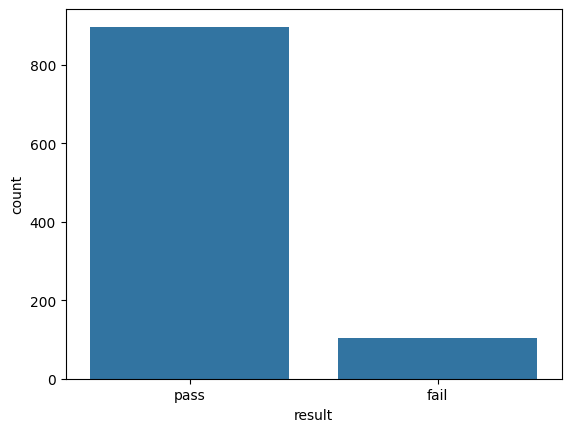

In [ ]:
sns.countplot(data=df, x="result")

Converting categorical data into numeric values using get_dummies()

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,math score,reading score,writing score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,result_pass
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True,True
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False,True
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True,True
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True,False
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True,True


Dropping the result_fail column as result_pass column is enough.
The boolean values in result column are converted into integer values (0 and 1).


In [ ]:
df_encoded = df_encoded.rename(columns={'result_pass': 'result'})
df_encoded['result'] = df_encoded['result'].astype(int)
df_encoded.head()

,math score,reading score,writing score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,result
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True,1
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False,1
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True,1
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True,0
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True,1


Setting the features and target.

In [ ]:
feature = df_encoded.drop('result', axis=1)
target = df_encoded['result']

As the data is preprocessed and ready, a Logistic Regression model is made.
The data is split into training and test sets.
The accuracy is printed after prediction.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.97

Confusion Matrix:
 [[1.         0.03351955]
 [0.         0.96648045]]





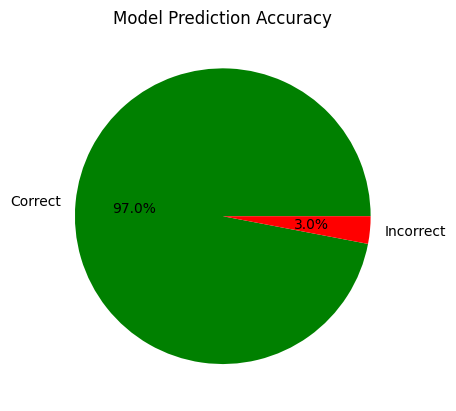

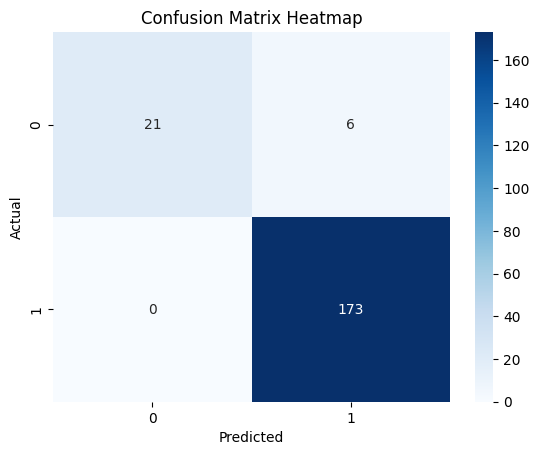

In [ ]:
f_train, f_test, t_train, t_test = train_test_split(feature, target, test_size=0.2, random_state = 42)
model = LogisticRegression()
model.fit(f_train,t_train)
t_pred = model.predict(f_test)
print("Accuracy:", accuracy_score(t_test, t_pred))
print("\nConfusion Matrix:\n",  confusion_matrix(t_test, t_pred, normalize='pred'))
print('\n\n')

correct = (t_test == t_pred).sum()
incorrect = (t_test != t_pred).sum()
plt.pie([correct, incorrect], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Model Prediction Accuracy')
plt.show()

print("\n\n\n")

cm = confusion_matrix(t_test, t_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

TP and TN have a percentage of 100% and 96% respectively. FP is 3% and FN is 0%.

**RESULT**

The trained model predicts with 97% accuracy.